In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import normalize 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC

In [2]:
# reading csv file and extracting class column to y.
data_set= pd.read_csv(r'C:\Users\Dell\Desktop\Shubham\SEM7\AIML\EXP5\cardio_train.csv',sep=';')
x= data_set.iloc[:, [9,10,11]].values
y= data_set.iloc[:, 12].values
print(x)
print(y)

[[0 0 1]
 [0 0 1]
 [0 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
[0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1
 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1
 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0

In [3]:
# Splitting the dataset into training and test set.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0)
svclassifier = SVC(kernel='linear')
clf=svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

[[ 7 83]
 [ 3 85]]
0.5168539325842697
0.5059523809523809
0.9659090909090909


C:\Users\Dell\AppData\Local\Temp\ipykernel_20468\163391496.py:6: RuntimeWarning: divide by zero encountered in divide
  z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1744: RuntimeWarning: invalid value encountered in subtract
  v1 = polygons[..., i1, :] - polygons[..., i2, :]
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1745: RuntimeWarning: invalid value encountered in subtract
  v2 = polygons[..., i2, :] - polygons[..., i3, :]
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\numeric.py:1663: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:113: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = v

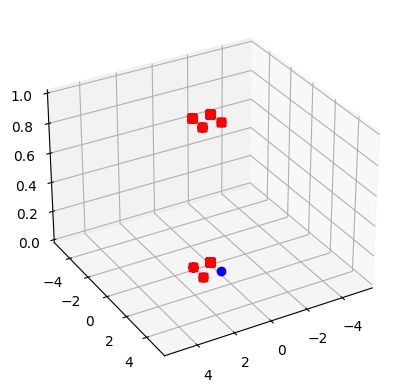

In [4]:
X = x_train[np.logical_or(y_train==0,y_train==1)]
Y = y_train[np.logical_or(y_train==0,y_train==1)]
# The equation of the separating plane is given by all x so that 
# np.dot(svc.coef_[0], x) + b = 0
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)
# print(x,y,z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


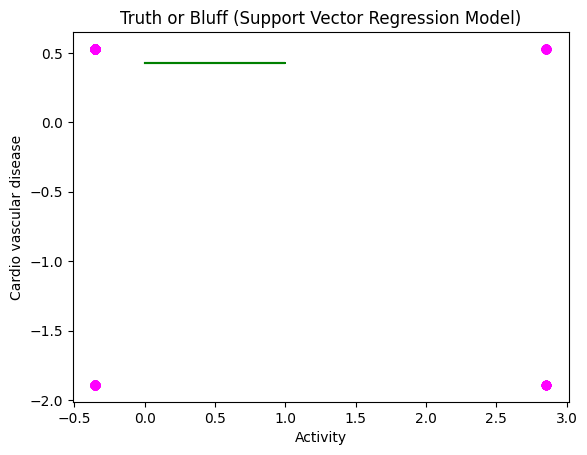

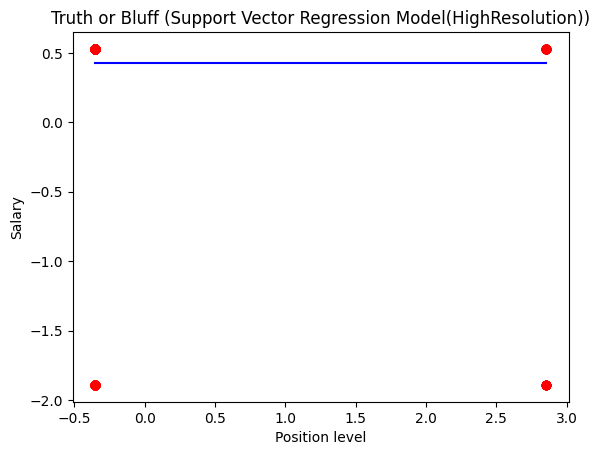

In [5]:

data_set= pd.read_csv(r'C:\Users\Dell\Desktop\Shubham\SEM7\AIML\EXP5\cardio_train.csv',sep=';')
x= data_set.iloc[:, 9:10].values
y= data_set.iloc[:, 11:12].values
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(x_train)
y = sc_y.fit_transform(y_train)
X_test = sc_X.fit_transform(x_test)
y_test = sc_y.fit_transform(y_test)
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
y_pred = regressor.predict(y_test)
plt.scatter(X, y, color = 'magenta')
plt.plot(x_test, regressor.predict(x_test), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Activity')
plt.ylabel('Cardio vascular disease')
plt.show()
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression Model(HighResolution))')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [6]:
x= data_set.iloc[:, 2:11].values
y= data_set.iloc[:, 12].values
print(x)
print(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0)

[[  2. 168.  62. ...   1.   0.   0.]
 [  1. 156.  85. ...   1.   0.   0.]
 [  1. 165.  64. ...   1.   0.   0.]
 ...
 [  1. 161.  93. ...   1.   0.   0.]
 [  1. 157.  68. ...   1.   0.   0.]
 [  1. 158.  65. ...   1.   0.   0.]]
[0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1
 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 0

[[72 18]
 [30 58]]
0.7303370786516854
0.7631578947368421
0.6590909090909091


Text(0, 0.5, 'Error Rate')

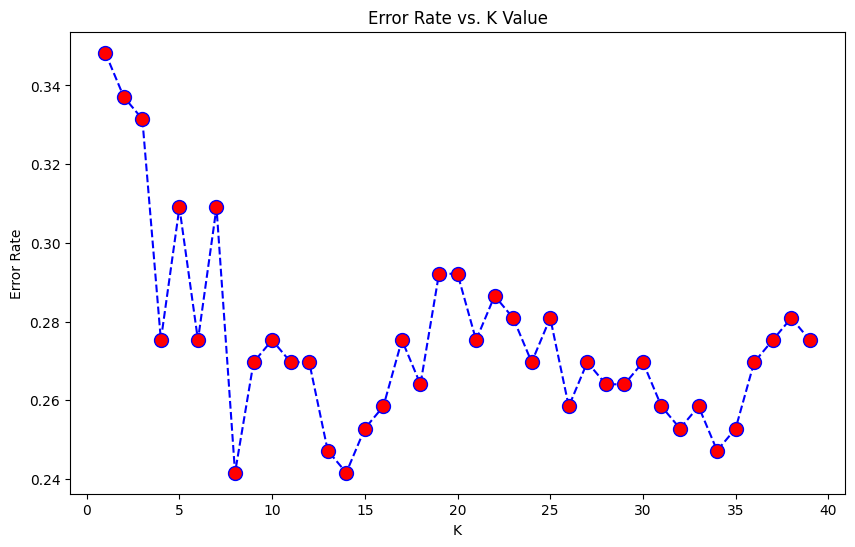

In [7]:
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)
classifier= KNeighborsClassifier(n_neighbors=24,metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
cm= confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')